In [1]:
# usar este notebook para criar uma aplicação para verificar tendência de alta e baixa
# https://query1.finance.yahoo.com/v7/finance/download/PETR4.SA?period1=946857600&period2=1599523200&interval=1d&events=history
# https://query1.finance.yahoo.com/v7/finance/download/MGLU3.SA?period1=1304294400&period2=1599523200&interval=1d&events=history


In [3]:
# importar bibliotecas

from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [23]:
acoes = pd.read_csv('/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/12_LSTM/PETR4SA_baixado08setembro2020.csv')
#acoes = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/PETR4.SA?period1=946857600&period2=1599523200&interval=1d&events=history')

In [5]:
acoes

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,4.050103,3.538944e+10
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,3.826055,2.886144e+10
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,3.787450,4.303360e+10
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,3.774351,3.405568e+10
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,3.791586,2.091264e+10
...,...,...,...,...,...,...,...
5178,2020-07-30,22.920000,22.920000,22.500000,22.820000,22.820000,5.785900e+07
5179,2020-07-31,22.920000,23.139999,22.160000,22.200001,22.200001,7.539730e+07
5180,2020-08-03,22.540001,22.549999,21.719999,21.799999,21.799999,6.359850e+07
5181,2020-08-04,21.459999,22.049999,21.250000,21.780001,21.780001,6.301190e+07


In [22]:
acoes.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5178,2020-07-30,22.920000,22.920000,22.500000,22.820000,22.820000,57859000.0
5179,2020-07-31,22.920000,23.139999,22.160000,22.200001,22.200001,75397300.0
5180,2020-08-03,22.540001,22.549999,21.719999,21.799999,21.799999,63598500.0
5181,2020-08-04,21.459999,22.049999,21.250000,21.780001,21.780001,63011900.0
5182,2020-08-05,22.230000,23.280001,22.230000,23.180000,23.180000,137214700.0


In [9]:
acoes = acoes.dropna()

In [10]:
acoes_treinamento = acoes.iloc[:,1:2 ].values

In [13]:
acoes_treinamento.shape

(5066, 1)

In [15]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [16]:
acoes_treinamento_normalizada = normalizador.fit_transform(acoes_treinamento)

In [21]:
acoes_treinamento_normalizada.shape

(5066, 1)

In [19]:
previsores = []

In [24]:
preco_real = []

In [26]:
acoes_treinamento_normalizada[90,0]

0.02044233807266982

In [27]:
acoes_treinamento_normalizada[0:90,0]

array([0.0264613 , 0.02132701, 0.02044234, 0.02014218, 0.02053712,
       0.02232227, 0.02014218, 0.02026856, 0.01777251, 0.01895735,
       0.01797788, 0.01837283, 0.01777251, 0.01758294, 0.01579779,
       0.01521327, 0.01521327, 0.01619273, 0.01560821, 0.01560821,
       0.01423381, 0.01579779, 0.01737757, 0.01974724, 0.02192733,
       0.02251185, 0.02448657, 0.02251185, 0.01995261, 0.01718799,
       0.01600316, 0.01758294, 0.024297  , 0.02350711, 0.02153239,
       0.02132701, 0.02093207, 0.02153239, 0.02390205, 0.02627172,
       0.02448657, 0.02488152, 0.0264613 , 0.02587678, 0.02903633,
       0.02903633, 0.02903633, 0.03129542, 0.03473934, 0.03180095,
       0.03180095, 0.02548183, 0.02666667, 0.02725118, 0.02627172,
       0.02350711, 0.02527646, 0.02549763, 0.02548183, 0.02548183,
       0.03238547, 0.02824645, 0.0278515 , 0.02567141, 0.02685624,
       0.02606635, 0.02557662, 0.02943128, 0.03080569, 0.031406  ,
       0.02922591, 0.02685624, 0.02902054, 0.02685624, 0.02685

In [28]:
# este loop é para adicionar elementos nos previsores e  preco_real
for i in range(90, 5066):
  previsores.append(acoes_treinamento_normalizada[i-90:i,0])
  preco_real.append(acoes_treinamento_normalizada[i,0])

In [30]:
preco_real[0]

0.02044233807266982

In [32]:
previsores[0]

array([0.0264613 , 0.02132701, 0.02044234, 0.02014218, 0.02053712,
       0.02232227, 0.02014218, 0.02026856, 0.01777251, 0.01895735,
       0.01797788, 0.01837283, 0.01777251, 0.01758294, 0.01579779,
       0.01521327, 0.01521327, 0.01619273, 0.01560821, 0.01560821,
       0.01423381, 0.01579779, 0.01737757, 0.01974724, 0.02192733,
       0.02251185, 0.02448657, 0.02251185, 0.01995261, 0.01718799,
       0.01600316, 0.01758294, 0.024297  , 0.02350711, 0.02153239,
       0.02132701, 0.02093207, 0.02153239, 0.02390205, 0.02627172,
       0.02448657, 0.02488152, 0.0264613 , 0.02587678, 0.02903633,
       0.02903633, 0.02903633, 0.03129542, 0.03473934, 0.03180095,
       0.03180095, 0.02548183, 0.02666667, 0.02725118, 0.02627172,
       0.02350711, 0.02527646, 0.02549763, 0.02548183, 0.02548183,
       0.03238547, 0.02824645, 0.0278515 , 0.02567141, 0.02685624,
       0.02606635, 0.02557662, 0.02943128, 0.03080569, 0.031406  ,
       0.02922591, 0.02685624, 0.02902054, 0.02685624, 0.02685

In [35]:
preco_real[0]

0.02044233807266982

In [45]:
previsores[0].shape

(90,)

In [47]:
previsores = np.array(previsores)

In [53]:
previsores.shape

(4976, 90)

In [50]:
preco_real = np.array(preco_real)

In [56]:
preco_real.shape

(4976,)

In [62]:
previsores.shape[0]

4976

In [63]:
previsores.shape[1]

90

In [64]:
# precisamos adaptar a entrada para seguir a especificação 
# https://keras.io/api/layers/recurrent_layers/lstm/
# inputs: A 3D tensor with shape [batch, timesteps, feature].
batch = previsores.shape[0] # 4976
timesteps = previsores.shape[1]
feature=1
previsores = np.reshape(previsores, (batch, timesteps, feature))

In [65]:
previsores.shape

(4976, 90, 1)

In [66]:
preco_real.shape

(4976,)

In [69]:
# vamos criar o modelo 
modelo_acao_petrobras = Sequential()

# units=100 são 100 neurônios e cada neurônio é uma célula de memória
# entrada input_shape=(timesteps, 1) input_shape=(90, 1)
# primeira camada lstm 
modelo_acao_petrobras.add(LSTM(units=100, return_sequences=True, input_shape=(timesteps, 1)) )
modelo_acao_petrobras.add(Dropout(0.3)) # para evitar overfitting

# segunda camada lstm 
modelo_acao_petrobras.add(LSTM(units=50, return_sequences=True) )
modelo_acao_petrobras.add(Dropout(0.3)) # para evitar overfitting

# terceira camada lstm 
modelo_acao_petrobras.add(LSTM(units=50, return_sequences=True) )
modelo_acao_petrobras.add(Dropout(0.3)) # para evitar overfitting

# quarta camada lstm 
# Vamos retirar return_sequences=True, pois após esta camada será a camada densa
modelo_acao_petrobras.add(LSTM(units=50) )
modelo_acao_petrobras.add(Dropout(0.3)) # para evitar overfitting

# rede neural densa
# camada de saída terá units=1 pois teremos apenas 1 resposta
# função de ativação linear, pois teremos um modelo que fará uma regressão linear
modelo_acao_petrobras.add(Dense(units=1, activation='linear'))

In [70]:
# https://keras.io/api/optimizers/rmsprop/
modelo_acao_petrobras.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='mean_absolute_error')

In [71]:
epocas=100
historico_epocas = modelo_acao_petrobras.fit(previsores, preco_real, epochs=epocas, batch_size=32)

Epoch 1/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0496
Epoch 2/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0027 - mean_absolute_error: 0.0351
Epoch 3/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0021 - mean_absolute_error: 0.0311
Epoch 4/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0018 - mean_absolute_error: 0.0287
Epoch 5/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0015 - mean_absolute_error: 0.0269
Epoch 6/100
156/156 [==============================] - 3s 19ms/step - loss: 0.0014 - mean_absolute_error: 0.0252
Epoch 7/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0013 - mean_absolute_error: 0.0248
Epoch 8/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0012 - mean_absolute_error: 0.0239
Epoch 9/100
156/156 [==============================] - 3s 18ms/step - loss: 0.0012 - mean_absolu

In [78]:
historico_epocas.history['mean_absolute_error']

[0.04957199841737747,
 0.03510380536317825,
 0.03109191730618477,
 0.028714707121253014,
 0.026906035840511322,
 0.025151418522000313,
 0.02480245567858219,
 0.023919928818941116,
 0.02300238609313965,
 0.02290441282093525,
 0.02200162224471569,
 0.021837912499904633,
 0.020971165969967842,
 0.020849213004112244,
 0.02051430195569992,
 0.020083943381905556,
 0.019984813407063484,
 0.0198749341070652,
 0.0195566788315773,
 0.01941176876425743,
 0.018977172672748566,
 0.01911274529993534,
 0.019135111942887306,
 0.018856974318623543,
 0.018432103097438812,
 0.018613917753100395,
 0.01819208823144436,
 0.018382303416728973,
 0.018508367240428925,
 0.01812615618109703,
 0.017912322655320168,
 0.017861854285001755,
 0.01780754327774048,
 0.017692796885967255,
 0.017450109124183655,
 0.017679743468761444,
 0.017161153256893158,
 0.017523949965834618,
 0.016882555559277534,
 0.017211711034178734,
 0.01719198375940323,
 0.017357492819428444,
 0.016903698444366455,
 0.01687389612197876,
 0.0167

In [79]:
historico_epocas.history['loss']

[0.005724961869418621,
 0.002660991158336401,
 0.002072200644761324,
 0.001782884355634451,
 0.0014835447072982788,
 0.0013690381310880184,
 0.0013330061919987202,
 0.0012334404746070504,
 0.001224262174218893,
 0.0011621671728789806,
 0.0010981763480231166,
 0.0010881883790716529,
 0.00102514517493546,
 0.0010192787740379572,
 0.0009834133088588715,
 0.0009452476515434682,
 0.0009142661583609879,
 0.0009398492984473705,
 0.0008829790749587119,
 0.0009139602771028876,
 0.000856453669257462,
 0.0008687824592925608,
 0.0008655805722810328,
 0.0008527961326763034,
 0.0008182813180610538,
 0.0008370018913410604,
 0.0008124836604110897,
 0.0008123103762045503,
 0.0008289499673992395,
 0.0007957298657856882,
 0.0007605868158861995,
 0.0007673277868889272,
 0.0007707166369073093,
 0.0007804146152921021,
 0.0007882972713559866,
 0.000778150511905551,
 0.0007274791714735329,
 0.0007490906864404678,
 0.0007135204505175352,
 0.0007419614703394473,
 0.0007633345085196197,
 0.000740993651561439,
 0

In [83]:
base_teste = pd.read_csv('/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/12_LSTM/PETR4SA_baixado08setembro2020_teste.csv')

In [84]:
base_teste.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-06,23.280001,23.530001,23.010000,23.219999,23.219999,56375100
1,2020-08-07,22.860001,22.910000,22.549999,22.790001,22.790001,56040200
2,2020-08-10,22.900000,23.450001,22.639999,23.450001,23.450001,52390100
3,2020-08-11,23.709999,23.879999,23.059999,23.080000,23.080000,66342300
4,2020-08-12,23.360001,23.680000,23.080000,23.480000,23.480000,67008500


In [81]:
preco_real_teste = base_teste.iloc[:, 1:2].values

In [82]:
preco_real_teste.shape

(22, 1)

In [85]:
base_completa = pd.concat((acoes['Open'], base_teste['Open']), axis=0)

In [86]:
base_completa

0      5.875000
1      5.550000
2      5.494000
3      5.475000
4      5.500000
        ...    
17    22.320000
18    22.200001
19    22.930000
20    22.610001
21    23.000000
Name: Open, Length: 5205, dtype: float64

In [87]:
base_completa.shape

(5205,)

In [88]:
base_teste.shape

(22, 7)

In [89]:
acoes.shape

(5183, 7)

In [92]:
tam_base_completa = len(base_completa)
tam_base_completa

5205

In [93]:
tam_base_teste = len(base_teste)
tam_base_teste

22

In [94]:
entradas = base_completa[ tam_base_completa - tam_base_teste - 90   :  ].values

In [95]:
entradas.shape # 

(112,)

In [97]:
90 + 22

112

In [98]:
entradas = entradas.reshape(-1, 1) 

In [100]:
entradas.shape

(112, 1)

In [101]:
entradas = normalizador.transform(entradas)

In [102]:
X_teste = []

In [108]:
for i in range(90, 112):
  X_teste.append(entradas[ i-90:i, 0 ])  # adicionando 90 em 90 elementos no X_teste

In [112]:
X_teste[1].shape

(90,)

In [113]:
X_teste = np.array(X_teste)

In [117]:
X_teste.shape # são 22 linhas do dataset de teste e cada linha terá 90 colunas

(22, 90)

In [119]:
# https://keras.io/api/layers/recurrent_layers/lstm/
# inputs: A 3D tensor with shape [batch, timesteps, feature].
batch_teste=X_teste.shape[0]

In [121]:
timesteps_teste=X_teste.shape[1]

In [123]:
feature_teste=1

In [124]:
X_teste=np.reshape(X_teste, (batch_teste, timesteps_teste, feature_teste))

In [125]:
X_teste.shape

(22, 90, 1)

In [126]:
previsoes = modelo_acao_petrobras.predict(X_teste)

In [128]:
previsoes

array([[0.28688028],
       [0.30218765],
       [0.30280098],
       [0.30232862],
       [0.31091198],
       [0.30951512],
       [0.31012952],
       [0.30189273],
       [0.298657  ],
       [0.30139452],
       [0.30335802],
       [0.29861963],
       [0.29691237],
       [0.30009478],
       [0.30412415],
       [0.30141866],
       [0.29437107],
       [0.29113084],
       [0.29144368],
       [0.29072404],
       [0.29941905],
       [0.29839486]], dtype=float32)

In [129]:
previsoes = normalizador.inverse_transform(previsoes)

In [130]:
previsoes

array([[22.359522],
       [23.328478],
       [23.367302],
       [23.3374  ],
       [23.880728],
       [23.792307],
       [23.831198],
       [23.309809],
       [23.104988],
       [23.278273],
       [23.402561],
       [23.102621],
       [22.994553],
       [23.196   ],
       [23.451057],
       [23.2798  ],
       [22.833689],
       [22.628582],
       [22.648384],
       [22.60283 ],
       [23.153225],
       [23.088394]], dtype=float32)

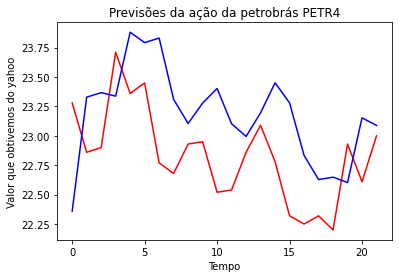

In [132]:
plt.plot(preco_real_teste, color='red', label='Preço Real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsões da ação da petrobrás PETR4')
plt.xlabel('Tempo')
plt.ylabel('Valor que obtivemos do yahoo')
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

MSE = mean_squared_error(preco_real_teste, previsoes)
RMSE = sqrt(MSE)
MAE = mean_absolute_error(preco_real_teste, previsoes)

print('MSE ', MSE, ' RMSE ', RMSE, ' MAE ', MAE)

MSE  0.31894104562738873  RMSE  0.5647486570390307  MAE  0.495553876825506


In [135]:
modelo_acao_petrobras_json = modelo_acao_petrobras.to_json()
with open('modelo.json', 'w') as arquivo_json:
  arquivo_json.write(modelo_acao_petrobras_json)

In [136]:
modelo_acao_petrobras.save_weights('modelo.h5')